# 0. Install dependencies

In [ ]:
!pip install spacy



# 1.   Import and Load Model




In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import re

Store a text in variable text which we need to summarise in the text

In [ ]:
text = """
Advanced Scatterometer (ASCAT)
ASCAT was primarily designed to provide global ocean wind vectors operationally. ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively. The ASCAT instrument can transmit pulses with vertical co-polarization (VV) operating in the C-band at 5.255 GHz. The ASCAT instrument has two sets of three fan-beam antennae that measure the returned backscatter signal at incident angles of 25–65°. The antennae extend to either side of the instrument, resulting in a double swath of observations, each 550 km wide, separated by a gap of approximately 360 km [19]. The microwave pulses can penetrate clouds and are not dependent on solar illumination, meaning that ASCAT can provide daily “all-condition” surface measurements and imaging covering approximately 80% of the globe [20]. ASCAT’s standard backscatter product has a nominal spatial resolution of 25 or 50 km with very high temporal resolution (i.e., multiple passes per day). However, to investigate the small-scale ice area considered in this study, we used a scatterometer image reconstruction (SIR) algorithm, specifically a 4.45-km resolution all-passes product that is a composite of several passes over the pole during a day [21]. This enhanced resolution product was provided by the Brigham Young University Microwave Earth Remote Sensing Laboratory [22]. All backscattering data were processed using the SIR algorithm [23], which uses multiple days of scatterometer data to create a grid-like resolution enhancement product. This algorithm assumes a linear model that relates the normalized radar cross section (σ0) to the signal incident angle (θ):
σ0 = A + B (θ − 40).
(1)
The model normalizes the incident angle to 40°. This will create two images, referred to as image A (including normalized backscattering values, in dB) and image B (representing the incident angle dependence of backscattering, in dB/°). In this study, image A of the v-polarization evening pass was utilized.
Advanced Microwave Scanning Radiometer 2 (AMSR2)
AMSR2 is the passive microwave radiometer instrument mounted onboard the Global Change Observation Mission Water (GCOM-W) satellite, which was launched in May of 2012. The AMSR2 instrument is a conical scanning passive microwave radiometer system that measures in seven frequency bands (in the range of 6.925–89.0 GHz) in both horizontal and vertical polarizations. The antenna’s different feedhorns scan at an incidence angle of 55° and provide a 1450 km swath of coverage at the Earth’s surface. Here, we used descending passes to find TB values for each frequency and polarization. Additionally, SIC values are provided as 10-km gridded data on a polar stereographic projection from the Japan Aerospace Exploration Agency (JAXA) as the AMSR2 Level 3 (L3) products.
As the value of σ0 is sensitive to melting of the snow or ice surface [20], melting represents a source of error. In the current study, surface melting was detected using the following procedure. Combining TB values at different frequencies and polarizations enables different stages of melting progression to be distinguished [24]. The combination of the horizontally polarized TB at 19 GHz (TB 19H) and the vertically polarized TB at 37 GHz (TB 37V) is the most sensitive index for detecting surface and subsurface melting. As snowmelt water drains from the upper snow cover to deeper layers, the emissivity of TB 19H increases and can even exceed the emissivity of TB 37V.
Therefore, the cross-polarization ratio (XPR) can be used as an index to determine whether melting has occurred in the surface or in the subsurface layer. Arndt et al. [25] represented these combinations of TB 19H and TB 37V derived from the passive microwave radiometers SSM/I and SSMIS mounted onboard the Defense Meteorological Satellite Program (DMSP) satellites via the XPR, which is expressed using the following equation:
XPR = TB 19H • TB 37V−1.
(2)
As the brightness temperature frequencies measured by the AMSR2 sensor were 18 and 36 GHz, the XPR was calculated in this study by replacing TB 19H with TB 18H and TB 37V with TB36V.
Markus and Burns [26] developed a polynya estimation model using the polarization ratio (PR) between 37 and 85 GHz, sensed by SSM/I. Moreover, the frequency of 36 GHz is affected by the open water fraction [27]. In this study, PR36, calculated using the following equation was used for identifying drift ice of different concentrations.
PR36 = (TB 36V − TB 36H) • (TB 36V + TB 36H))−1
(3)
In this study, the PR36 and XPR values were calculated using TB 18H, TB 36V, and TB 36H of the AMSR2 L3 product.
MODIS Imagery
The MODIS instruments onboard the Terra and Aqua spacecraft provide a wealth of spectral and spatial information about the Earth. One of the most aesthetically pleasing MODIS products is the true color images (also known as natural color images) of the Earth at a 250-m spatial resolution. MODIS is the first orbiting imaging sensor to provide such images at a reasonably high spatial resolution over a wide swathe. In the current study, we used MODIS-corrected reflectance true color GeoTIFF imagery to validate the classification results. The MODIS Imagery products were obtained from the NASA’s Earth Observing System Data and Information System (EOSDIS). Additionally, EODIS publishes coastline data via OpenStreetMap. In the current study, coastline data were used to classify areas of land and sea.
Sentinel-1 Level 1 Product
Sentinel-1 was launched on the 3rd of April 2014, from Kourou Spaceport in French Guiana. Data became operationally available around October of 2014, following a commissioning phase. The main instrument of Sentinel-1 is a C-band synesthetic aperture radar (C-SAR) instrument, which provides data in the form of SAR images with various modes and resolutions. Hereafter, C-band SAR images are referred to as C-SAR images for simplicity. For operational large-scale ice areas, we used the ground range detected extended wide swath mode at a medium resolution (93 × 87 m) corresponding to an equivalent number of looks of 12.7. Data were provided with 40 × 40 m pixel spacing. Sentinel-1 level 1 products were provided by the ESA’s Copernicus Open Access Hub.
"""
text

'\nAdvanced Scatterometer (ASCAT)\nASCAT was primarily designed to provide global ocean wind vectors operationally. ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively. The ASCAT instrument can transmit pulses with vertical co-polarization (VV) operating in the C-band at 5.255 GHz. The ASCAT instrument has two sets of three fan-beam antennae that measure the returned backscatter signal at incident angles of 25–65°. The antennae extend to either side of the instrument, resulting in a double swath of observations, each 550 km wide, separated by a gap of approximately 360 km [19]. The microwave pulses can penetrate clouds and are not dependent on solar illumination, meaning that ASCAT can provide daily “all-condition” surface measurements and imaging covering a

# 2.   Data Cleaning



In [ ]:
CURRENCIES = {
    "$": "USD", "zł": "PLN", "£": "GBP", "¥": "JPY", "฿": "THB", "₡": "CRC", "₦": "NGN","₩": "KRW",
    "₪": "ILS", "₫": "VND", "€": "EUR", "₱": "PHP", "₲": "PYG", "₴": "UAH", "₹": "INR",}
CURRENCY_REGEX = re.compile(
    "({})+".format("|".join(re.escape(c) for c in CURRENCIES.keys())))

EMAIL_REGEX = re.compile(
    r"(?:^|(?<=[^\w@.)]))([\w+-](\.(?!\.))?)*?[\w+-]@(?:\w-?)*?\w+(\.([a-z]{2,})){1,3}(?:$|(?=\b))",
    flags=re.IGNORECASE | re.UNICODE,)

contractions =          {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have", "i've": "i have"}

def clean_text(text, remove_stopwords = True):    
    text = text.lower()
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = EMAIL_REGEX.sub(' ',text)
    text = CURRENCY_REGEX.sub(' ',text)
    text = ' '.join([contractions[t] if t in contractions else t for t in text.split(" ")])    
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r"'s\b","", text)
    text = re.sub(r'&amp;', '', text) 
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text


In [ ]:
#Adding additional next line tag in it
stopwords = list(STOP_WORDS)
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'




# 3.   Tokenize the words from the sentences in text







In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)

['\n', 'Advanced', 'Scatterometer', '(', 'ASCAT', ')', '\n', 'ASCAT', 'was', 'primarily', 'designed', 'to', 'provide', 'global', 'ocean', 'wind', 'vectors', 'operationally', '.', 'ASCAT', 'is', 'an', 'active', 'microwave', 'advanced', 'scatterometer', 'mounted', 'onboard', 'the', 'polar', '-', 'orbiting', 'satellites', 'MetOp', '-', 'A', 'and', 'MetOp', '-', 'B', ',', 'which', 'are', 'operated', 'by', 'the', 'European', 'Organization', 'for', 'the', 'Exploitation', 'of', 'Meteorological', 'Satellites', ',', 'and', 'these', 'satellites', 'were', 'launched', 'in', '2006', 'and', '2012', ',', 'respectively', '.', 'The', 'ASCAT', 'instrument', 'can', 'transmit', 'pulses', 'with', 'vertical', 'co', '-', 'polarization', '(', 'VV', ')', 'operating', 'in', 'the', 'C', '-', 'band', 'at', '5.255', 'GHz', '.', 'The', 'ASCAT', 'instrument', 'has', 'two', 'sets', 'of', 'three', 'fan', '-', 'beam', 'antennae', 'that', 'measure', 'the', 'returned', 'backscatter', 'signal', 'at', 'incident', 'angles',

# 4. Calculate word frequencies from text after removing the stopwords and punctuations

In [ ]:
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text not in word_frequencies.keys():
            word_frequencies[word.text] = 1
        else:
            word_frequencies[word.text] += 1
print(word_frequencies)

{'\n': 21, 'Advanced': 2, 'Scatterometer': 1, '(': 28, 'ASCAT': 7, ')': 26, 'primarily': 1, 'designed': 1, 'provide': 5, 'global': 1, 'ocean': 1, 'wind': 1, 'vectors': 1, 'operationally': 2, '.': 43, 'active': 1, 'microwave': 5, 'advanced': 1, 'scatterometer': 3, 'mounted': 3, 'onboard': 4, 'polar': 2, '-': 22, 'orbiting': 2, 'satellites': 3, 'MetOp': 2, 'B': 3, ',': 40, 'operated': 1, 'European': 1, 'Organization': 1, 'Exploitation': 1, 'Meteorological': 2, 'Satellites': 1, 'launched': 3, '2006': 1, '2012': 2, 'respectively': 1, 'instrument': 7, 'transmit': 1, 'pulses': 2, 'vertical': 2, 'co': 1, 'polarization': 5, 'VV': 1, 'operating': 1, 'C': 5, 'band': 3, '5.255': 1, 'GHz': 7, 'sets': 1, 'fan': 1, 'beam': 1, 'antennae': 2, 'measure': 1, 'returned': 1, 'backscatter': 2, 'signal': 2, 'incident': 4, 'angles': 1, '25–65': 1, '°': 4, 'extend': 1, 'resulting': 1, 'double': 1, 'swath': 3, 'observations': 1, '550': 1, 'km': 6, 'wide': 3, 'separated': 1, 'gap': 1, 'approximately': 2, '360':

# 5. Calculate the maximum frequency and divide it by all frequencies to get normalized word frequencies.

In [ ]:
max_frequency = max(word_frequencies.values())
max_frequency

43

In [ ]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
print(word_frequencies)

{'\n': 0.4883720930232558, 'Advanced': 0.046511627906976744, 'Scatterometer': 0.023255813953488372, '(': 0.6511627906976745, 'ASCAT': 0.16279069767441862, ')': 0.6046511627906976, 'primarily': 0.023255813953488372, 'designed': 0.023255813953488372, 'provide': 0.11627906976744186, 'global': 0.023255813953488372, 'ocean': 0.023255813953488372, 'wind': 0.023255813953488372, 'vectors': 0.023255813953488372, 'operationally': 0.046511627906976744, '.': 1.0, 'active': 0.023255813953488372, 'microwave': 0.11627906976744186, 'advanced': 0.023255813953488372, 'scatterometer': 0.06976744186046512, 'mounted': 0.06976744186046512, 'onboard': 0.09302325581395349, 'polar': 0.046511627906976744, '-': 0.5116279069767442, 'orbiting': 0.046511627906976744, 'satellites': 0.06976744186046512, 'MetOp': 0.046511627906976744, 'B': 0.06976744186046512, ',': 0.9302325581395349, 'operated': 0.023255813953488372, 'European': 0.023255813953488372, 'Organization': 0.023255813953488372, 'Exploitation': 0.02325581395

# 6. Get sentence tokens

In [ ]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[
Advanced Scatterometer (ASCAT)
ASCAT was primarily designed to provide global ocean wind vectors operationally., ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively., The ASCAT instrument can transmit pulses with vertical co-polarization (VV) operating in the C-band at 5.255 GHz., The ASCAT instrument has two sets of three fan-beam antennae that measure the returned backscatter signal at incident angles of 25–65°., The antennae extend to either side of the instrument, resulting in a double swath of observations, each 550 km wide, separated by a gap of approximately 360 km [19]., The microwave pulses can penetrate clouds and are not dependent on solar illumination, meaning that ASCAT can provide daily “all-condition” surface measurements and imaging coverin

Calculate the most important sentences by adding the word frequencies in each sentence.

In [ ]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
sentence_scores

{
 Advanced Scatterometer (ASCAT)
 ASCAT was primarily designed to provide global ocean wind vectors operationally.: 3.6279069767441863,
 ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively.: 6.209302325581396,
 The ASCAT instrument can transmit pulses with vertical co-polarization (VV) operating in the C-band at 5.255 GHz.: 3.8139534883720936,
 The ASCAT instrument has two sets of three fan-beam antennae that measure the returned backscatter signal at incident angles of 25–65°.: 2.162790697674419,
 The antennae extend to either side of the instrument, resulting in a double swath of observations, each 550 km wide, separated by a gap of approximately 360 km [19].: 5.162790697674419,
 The microwave pulses can penetrate clouds and are not dependent on solar ill

From headhq import nlargest and calculate  40% of text with maximum score.

In [ ]:
from heapq import nlargest
select_length = int(len(sentence_tokens)*(40/100))
select_length

19

Get the summary of text.

In [ ]:
summary = nlargest(select_length, sentence_scores,key = sentence_scores.get)
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)
print(text)


Advanced Scatterometer (ASCAT)
ASCAT was primarily designed to provide global ocean wind vectors operationally. ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively. The ASCAT instrument can transmit pulses with vertical co-polarization (VV) operating in the C-band at 5.255 GHz. The ASCAT instrument has two sets of three fan-beam antennae that measure the returned backscatter signal at incident angles of 25–65°. The antennae extend to either side of the instrument, resulting in a double swath of observations, each 550 km wide, separated by a gap of approximately 360 km [19]. The microwave pulses can penetrate clouds and are not dependent on solar illumination, meaning that ASCAT can provide daily “all-condition” surface measurements and imaging covering appr

In [ ]:
print(summary)

However, to investigate the small-scale ice area considered in this study, we used a scatterometer image reconstruction (SIR) algorithm, specifically a 4.45-km resolution all-passes product that is a composite of several passes over the pole during a day [21]. This will create two images, referred to as image A (including normalized backscattering values, in dB) and image B (representing the incident angle dependence of backscattering, in dB/°). 
Advanced Microwave Scanning Radiometer 2 (AMSR2)
AMSR2 is the passive microwave radiometer instrument mounted onboard the Global Change Observation Mission Water (GCOM-W) satellite, which was launched in May of 2012. ASCAT is an active microwave advanced scatterometer mounted onboard the polar-orbiting satellites MetOp-A and MetOp-B, which are operated by the European Organization for the Exploitation of Meteorological Satellites, and these satellites were launched in 2006 and 2012, respectively. As snowmelt water drains from the upper snow co

In [ ]:
len(text)

6440

In [ ]:
len(summary)

3619

# Discussion

In [ ]:
import tkinter as tk

    

root = tk.Tk()
root.title("News Summmarization")
root.geometry('1200x600')


slabel = tk.Label(root, text="Summary")
slabel.pack()

summary = tk.Text(root, height=20, width=140)
summary.pack()


ulabel = tk.Label(root, text="URL")
ulabel.pack()

utext = tk.Text(root, height=1, width=140)
utext.pack()

btn = tk.Button(root, text='Summarize')
btn.pack()

root.mainloop()

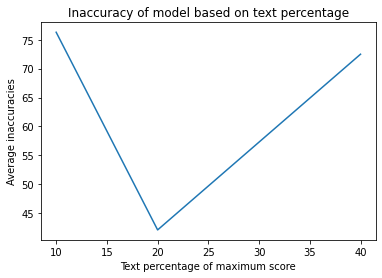

In [ ]:
import matplotlib.pyplot as plt

x = [10,20,40]
# corresponding y axis values
y = [76.3,42.1,72.5]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Text percentage of maximum score')
# naming the y axis
plt.ylabel('Average inaccuracies')
 
# giving a title to my graph
plt.title('Inaccuracy of model based on text percentage')
 
# function to show the plot
plt.show()